* task is binary classification
* target variable **Churn**

* inbalance data set

# Set up

In [102]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px  
import plotly.io as pio
import numpy as np
import plotly.graph_objects as go


import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, auc, roc_curve

import pickle
import joblib


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# functions

In [2]:
# def plot_2d_feauture(df_no,df_yes,  feature_1, feature_2):
#     plt.scatter(df_no[feature_1],df_no[feature_2], color='red', marker='o', label='Class A')
#     plt.scatter(df_yes[feature_1],df_yes[feature_2], color='green', marker='+', label='Class B') 
#     plt.xlabel('{} feature'.format(feature_1)) 
#     plt.ylabel('{} feature'.format(feature_2)) 
#     plt.legend()
#     plt.show()  
def plot_2d_feauture(df,feature_1,feature_2 ):
    fig = px.scatter(
        data_frame=df,
        x=feature_1,
        y=feature_2,
        color="Churn",
        color_discrete_sequence=['red', 'green'],
        # color_discrete_map={'Europe': 'black', 'Africa': 'yellow'},
         # opacity=0.3,              # opacity values range from 0 to 1
        # symbol='Year',            # symbol used for bubble
        # symbol_map={"2005": "square-open", "2010": 3},
         # size='resized_pop',       # size of bubble
         # size_max=50,              # set the maximum mark size when using size
        # log_x=True,  # you can also set log_y and log_z as a log scale
         template='plotly',         # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                # 'plotly_white', 'plotly_dark', 'presentation',
                                # 'xgridoff', 'ygridoff', 'gridon', 'none'
         title='visualization: {} and {} '.format(feature_1, feature_2),
          # labels={'Years in school (avg)': 'Years Women are in School'},
         # hover_data={'Continent': False, 'GDP per capita': ':.1f'},
         hover_name='Churn',        # values appear in bold in the hover tooltip
         height=500,                 # height of graph in pixels
        #  width=500

    )

    pio.show(fig)


In [3]:
def plot_3d_feauture(df, feature_1,feature_2,  feature_3):
    # Use for animation rotation at the end
    x_eye = -1.25
    y_eye = 2
    z_eye = 0.5




    fig = px.scatter_3d(
         data_frame=df,
         x=feature_1,
         y=feature_2,
         z=feature_3,
          color="Churn",
          color_discrete_sequence=['red', 'green'],
        # color_discrete_map={'Europe': 'black', 'Africa': 'yellow'},
        # opacity=0.3,              # opacity values range from 0 to 1
        # symbol='Year',            # symbol used for bubble
         # symbol_map={"2005": "square-open", "2010": 3},
        # size='resized_pop',       # size of bubble
         # size_max=50,              # set the maximum mark size when using size
        #  log_x=True,  # you can also set log_y and log_z as a log scale
         # range_z=[9,13],           # you can also set range of range_y and range_x
          template='plotly',         # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                # 'plotly_white', 'plotly_dark', 'presentation',
                                # 'xgridoff', 'ygridoff', 'gridon', 'none'
         title='see {}, {} and {}'.format(feature_1, feature_2, feature_3),
         # labels={'Years in school (avg)': 'Years Women are in School'},
         # hover_data={'Continent': False, 'GDP per capita': ':.1f'},
         hover_name='Churn',        # values appear in bold in the hover tooltip
        height=700,                 # height of graph in pixels

        # animation_frame='Year',   # assign marks to animation frames
        # range_x=[500,100000],
        # range_z=[0,14],
        # range_y=[5,100]

         )

    pio.show(fig)

# Read Data

In [4]:
dir_read_data = "/home/yasaman/Documents/Projects/rayankar_test/python_developer_AI_ask/data"
df = pd.read_csv(dir_read_data  + "/WA_Fn-UseC_-Telco-Customer-Churn.csv" )
print("General information about data")
print("shape pf data:", df.shape)
print("shape of data after drop duplicates: ",df.drop_duplicates().shape)
print("columns of dataframe:", df.columns.tolist())

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print("\n")
print(numeric_data.shape[1])
print(numeric_data.columns.tolist())
print(categorical_data.shape[1])
print(categorical_data.columns.tolist())

General information about data
shape pf data: (7043, 21)
shape of data after drop duplicates:  (7043, 21)
columns of dataframe: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


3
['SeniorCitizen', 'tenure', 'MonthlyCharges']
18
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [5]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# for i in df.columns.tolist():
#     print(i)
#     null_val_percent = df[i].isna().sum() *100 / len(df[i])
#     print(null_val_percent)

In [8]:
# for i in df.columns.tolist():
#     print(i)
#     null_val_percent = df[i].isna().sum() *100 / len(df[i])
#     print(null_val_percent)

In [9]:
# df["TotalCharges"] = 
df["TotalCharges"].replace({' '}, None, inplace = True)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["SeniorCitizen"].unique().tolist()
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)
df["SeniorCitizen"].replace({'0'}, 'No', inplace = True)
df["SeniorCitizen"].replace({'1'}, 'Yes', inplace = True)

In [10]:
# df[df["TotalCharges"].isna()].head()
# df["tenure"].unique().tolist()

In [11]:
target_col = ["Churn"]

numerical_col = [ "tenure", "MonthlyCharges", "TotalCharges",
                 ]
categorical_val = [x for x in df.columns.tolist() if x not in target_col and x not in numerical_col and x != 'customerID']
categorical_val

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [12]:
# see range and domain of variable

print("numerical columns:")
print("tenure min, mean, max, std:" ,df["tenure"].min(),df["tenure"].mean() ,df["tenure"].max(), df["tenure"].std(), df[df["tenure"].isna()].shape)
print("MonthlyCharges min, mean, max, std:" ,df["MonthlyCharges"].min(),df["MonthlyCharges"].mean() ,df["MonthlyCharges"].max(), df["MonthlyCharges"].std(), df[df["MonthlyCharges"].isna()].shape)
print("TotalCharges min, mean, max, std:" ,df["TotalCharges"].min(),df["TotalCharges"].mean() ,df["TotalCharges"].max(), df["TotalCharges"].std(), df[df["TotalCharges"].isna()].shape)

print("\n")

print("categorical columns:")
for item in categorical_val:
    if item != 'customerID':
        print(item,"-",  len(df[item].unique().tolist()),  df[item].unique().tolist(), df[df[item].isna()].shape)


print("\n")

print("number of No in Churn:", 100 *  df[df["Churn"]== "No"].shape[0]/df.shape[0])
print("number of Yes in Churn:", 100 *  df[df["Churn"]== "Yes"].shape[0]/df.shape[0])

print("\n")
print(df["Churn"].unique().tolist())


numerical columns:
tenure min, mean, max, std: 0 32.37114865824223 72 24.55948102309446 (0, 21)
MonthlyCharges min, mean, max, std: 18.25 64.76169246059918 118.75 30.090047097678493 (0, 21)
TotalCharges min, mean, max, std: 18.8 2283.3004408418656 8684.8 2266.771361883145 (11, 21)


categorical columns:
gender - 2 ['Female', 'Male'] (0, 21)
SeniorCitizen - 2 ['No', 'Yes'] (0, 21)
Partner - 2 ['Yes', 'No'] (0, 21)
Dependents - 2 ['No', 'Yes'] (0, 21)
PhoneService - 2 ['No', 'Yes'] (0, 21)
MultipleLines - 3 ['No phone service', 'No', 'Yes'] (0, 21)
InternetService - 3 ['DSL', 'Fiber optic', 'No'] (0, 21)
OnlineSecurity - 3 ['No', 'Yes', 'No internet service'] (0, 21)
OnlineBackup - 3 ['Yes', 'No', 'No internet service'] (0, 21)
DeviceProtection - 3 ['No', 'Yes', 'No internet service'] (0, 21)
TechSupport - 3 ['No', 'Yes', 'No internet service'] (0, 21)
StreamingTV - 3 ['No', 'Yes', 'No internet service'] (0, 21)
StreamingMovies - 3 ['No', 'Yes', 'No internet service'] (0, 21)
Contract - 

# see what we have

In [13]:
feature_1 = "MonthlyCharges"
feature_2 = "TotalCharges"
plot_2d_feauture(df, feature_1,feature_2 )

In [14]:
feature_1 = "MonthlyCharges"
feature_2 = "gender"
plot_2d_feauture(df, feature_1,feature_2 )

In [15]:
feature_1 = "MonthlyCharges"
feature_2 = "tenure"
plot_2d_feauture(df, feature_1,feature_2 )

In [16]:
feature_1 = "StreamingMovies"
feature_2 = "StreamingTV"
plot_2d_feauture(df, feature_1,feature_2 )

In [17]:
feature_1 = "TotalCharges"
feature_2 = "tenure"
plot_2d_feauture(df, feature_1,feature_2 )

In [18]:
feature_1 = "TotalCharges"
feature_2 = "tenure"
feature_3 = "MonthlyCharges"
plot_3d_feauture(df, feature_1,feature_2,  feature_3)


In [19]:
feature_1 = "TotalCharges"
feature_2 = "DeviceProtection"
feature_3 = "PaymentMethod"
plot_3d_feauture(df, feature_1,feature_2,  feature_3)

In [20]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

# fill nan in TotalCharges

## approach 1

In [21]:
print(df["TotalCharges"].median())
df["TotalCharges"].describe()

1397.475


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

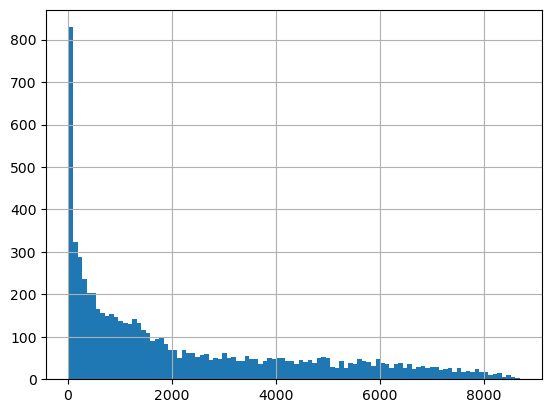

In [22]:
df["TotalCharges"].hist(bins = 100)

<AxesSubplot:>

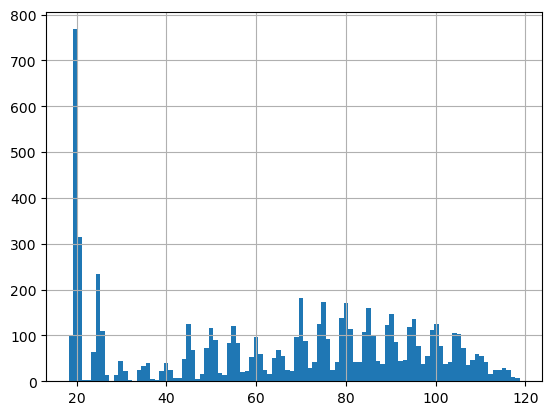

In [23]:
df["MonthlyCharges"].hist(bins = 100)

In [24]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)

## approach 2

<AxesSubplot:>

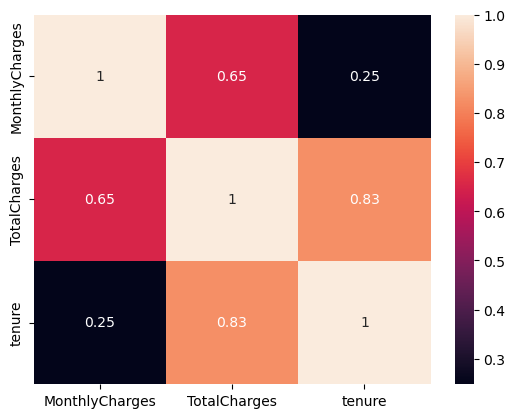

In [25]:
corr_ = df[["MonthlyCharges", "TotalCharges","SeniorCitizen", "tenure"] ].corr()
sns.heatmap(corr_, annot=True)

In [26]:
corr_

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.650864,0.247900
TotalCharges,0.650864,1.000000,0.825464
tenure,0.247900,0.825464,1.000000


In [27]:
corr_["MonthlyCharges"].max()

1.0

In [28]:
from scipy.stats import skew

"""For normally distributed data, the skewness should be about 0.
 A skewness value > 0 means that there is more weight in the left tail of the distribution."""

threshould = 0.5
skew_column = skew(df["TotalCharges"].dropna())
if skew_column > threshould or skew_column < threshould:
    filnan_val = df["TotalCharges"].dropna().median()
else:
    filnan_val = df["TotalCharges"].dropna().mean()
    

print(skew(df["TotalCharges"].dropna()))

0.9635838161778828


In [29]:
df["MonthlyCharges"].isna().sum()

0

In [30]:
df[["MonthlyCharges", "TotalCharges"]].head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


In [31]:
df[df["TotalCharges"].isna()].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [32]:
mask_1 = df["MonthlyCharges"] < 100
mask_2 = df["MonthlyCharges"]>=30
df_test_1 = df[mask_1 & mask_2]
print(df_test_1.shape)

(4482, 21)


In [33]:
print(df_test_1["TotalCharges"].median())
df_test_1["TotalCharges"].describe()

1692.25


count    4482.000000
mean     2215.982670
std      1938.964401
min        30.200000
25%       490.912500
50%      1692.250000
75%      3622.637500
max      7422.100000
Name: TotalCharges, dtype: float64

In [34]:
df["TotalCharges"].isna().sum()

0

# change categorical to numerical

In [35]:
# create an encoder and fit the dataframe
# enc = OneHotEncoder(handle_unknown='ignore').fit(df[categorical_val])
# enc = OneHotEncoder(min_frequency=5, sparse=False).fit(df[categorical_val])
enc = OneHotEncoder( sparse=False).fit(df[categorical_val])

encoded = enc.transform(df[categorical_val])

encoded_df = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
print(encoded_df.shape)


(7043, 43)


In [36]:
encoded_df[numerical_col] = df[numerical_col]
encoded_df["customerID"] = df["customerID"]
encoded_df[target_col] = df[target_col]
encoded_df["Churn"].replace({"No"},0, inplace = True)
encoded_df["Churn"].replace({"Yes"},1, inplace = True)

# 

In [37]:
encoded_df.head(1)

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,customerID,Churn
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,29.85,29.85,7590-VHVEG,0


In [38]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [39]:
# data = df
data = encoded_df
data.set_index("customerID", inplace = True)
print(data.shape)

(7043, 47)


# EDA

In [40]:
catgory_list =['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
]
print(len(catgory_list))

15


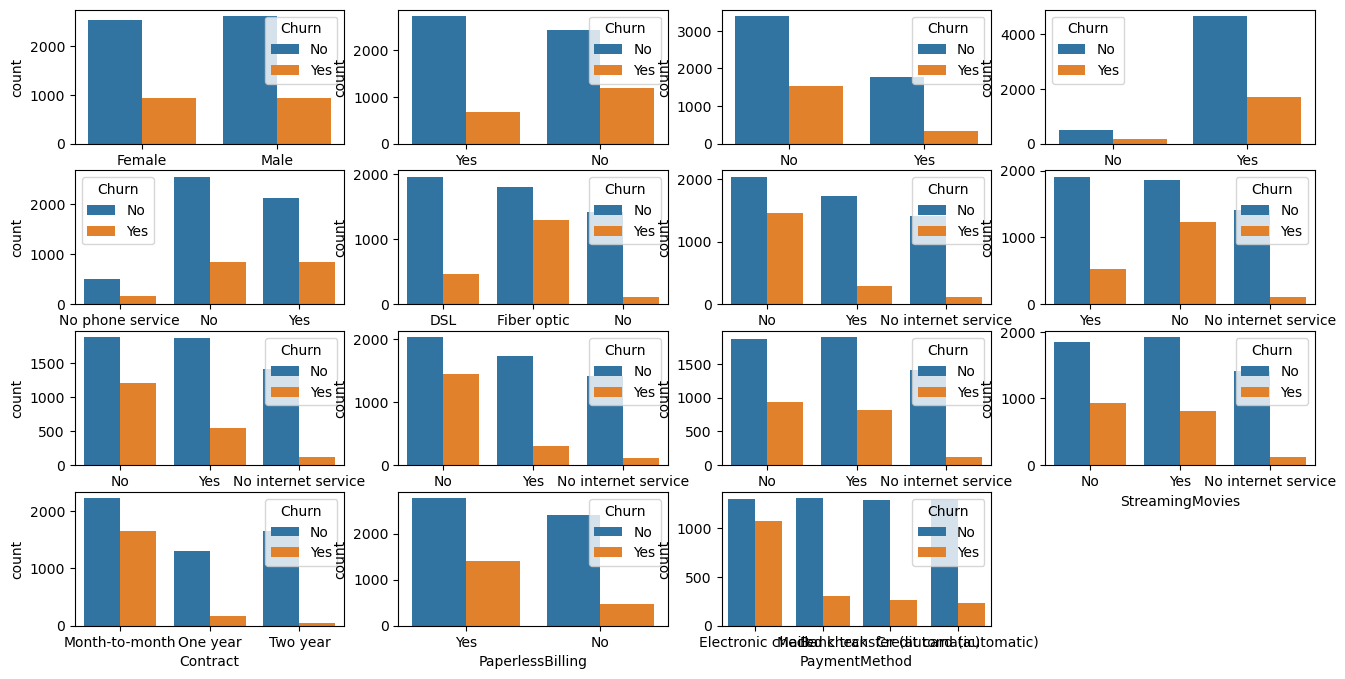

In [41]:
fig = plt.figure(figsize = (16, 8))

for i in range(len(catgory_list)):
    column = catgory_list[i]
    sub = fig.add_subplot(4,4,i+1)
    chart = sns.countplot(data = df, x = column, hue = "Churn")

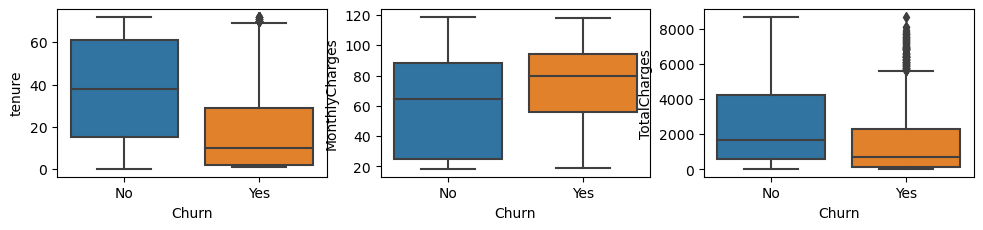

In [71]:
numerical_ = ["tenure", "MonthlyCharges", "TotalCharges"]
fig = plt.figure(figsize = (16,10))

for i in range(len(numerical_)):
    column = numerical_[i]
    sub = fig.add_subplot(4,4,i+1)
    chart = sns.boxplot(data = df, y = column, x = "Churn")

# Baseline

In [66]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = target_col), data[target_col], test_size=0.33, random_state=42)
x_val, x_test, y_val, y_test  = train_test_split(x_test, y_test, test_size=0.4, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


print(type(x_train))
print(type(y_train))

(4718, 46)
(1395, 46)
(930, 46)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [43]:
def check_error(y_real, y_pred):
    print("accuracy: ",accuracy_score(y_pred,y_real, normalize = True ))
    print("f1_score: ",f1_score(y_pred,y_real ))
    print("precision:", precision_score(y_pred,y_real ))
    print("recall:   ",recall_score(y_pred,y_real))
    sns.heatmap(confusion_matrix(y_real,y_pred), annot=True)

In [44]:
def ROC_AUC(model_name, y_real, y_pre):
    roc_auc_ovr = roc_auc_score(y_real,y_pre)
    print(f"ROC AUC score of {model_name}: {roc_auc_ovr:.2f}")

    RocCurveDisplay.from_predictions(y_real,y_pre, name="ROC", color="darkorange")
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC curves:{model_name}")
    plt.legend()
    plt.show()


# Models

##  Logistic Regression

In [45]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pre_train_lr = reg.predict(x_train)
y_pre_val_lr = reg.predict(x_val)

check bias
accuracy:  0.8054260279779568
f1_score:  0.5864864864864865
precision: 0.5245769540692989
recall:    0.6649642492339122
ROC AUC score of Lr: 0.72


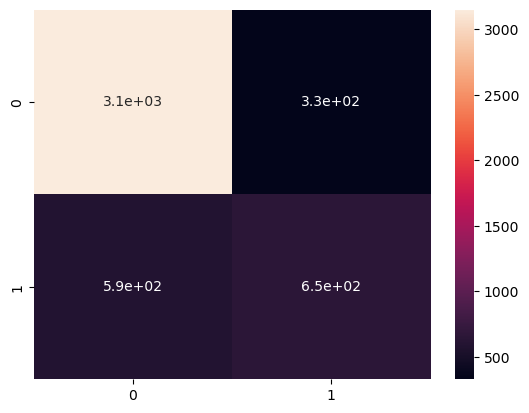

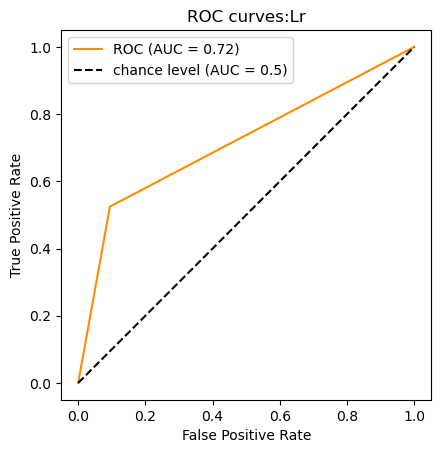

In [46]:
print("check bias")
check_error(y_train, y_pre_train_lr)
ROC_AUC("Lr", y_train, y_pre_train_lr)


check variance
accuracy:  0.8150537634408602
f1_score:  0.6293103448275862
precision: 0.5718015665796344
recall:    0.6996805111821086
ROC AUC score of Lr: 0.74


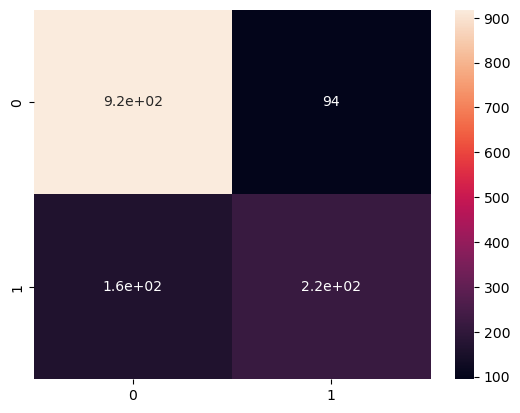

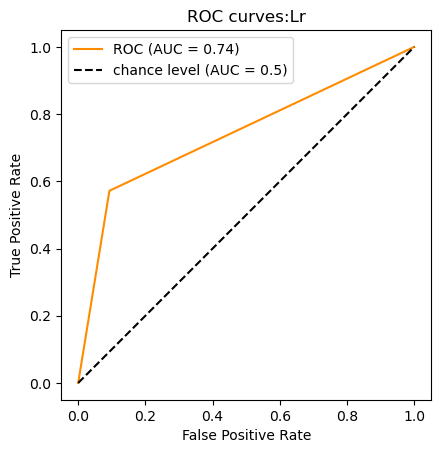

In [47]:
print("check variance")
check_error(y_val, y_pre_val_lr)
ROC_AUC("Lr", y_val, y_pre_val_lr)

## svm

In [48]:
SV = SVC()
SV.fit(x_train, y_train)
y_pre_train_sv = SV.predict(x_train)
y_pre_val_sv = SV.predict(x_val)


In [49]:
cross_val_score(SV, x_train, y_train, cv=5, scoring='recall_macro')

array([0.5, 0.5, 0.5, 0.5, 0.5])

check bias
accuracy:  0.7369648155998304
f1_score:  0.0
precision: 0.0
recall:    0.0
ROC AUC score of Lr: 0.50


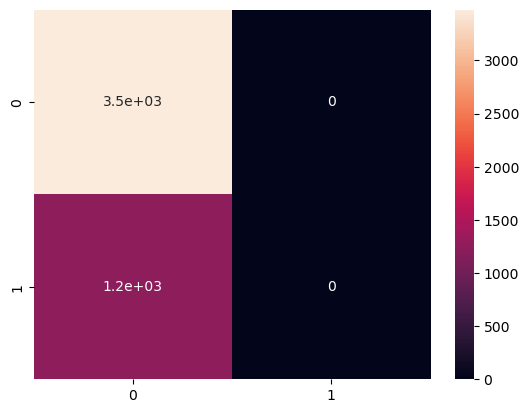

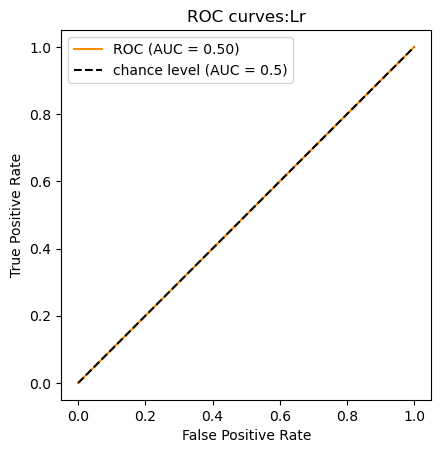

In [50]:
print("check bias")
check_error(y_train, y_pre_train_sv)
ROC_AUC("Lr", y_train, y_pre_train_sv)

check variance
accuracy:  0.7254480286738352
f1_score:  0.0
precision: 0.0
recall:    0.0
ROC AUC score of Lr: 0.50


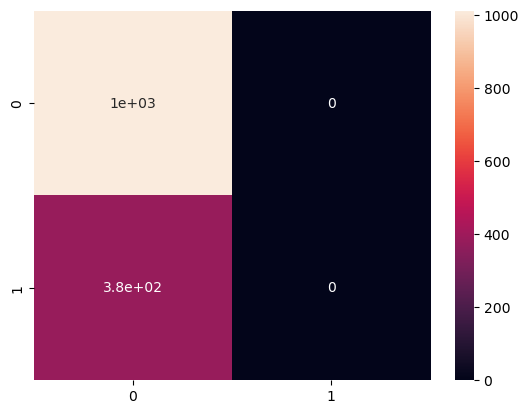

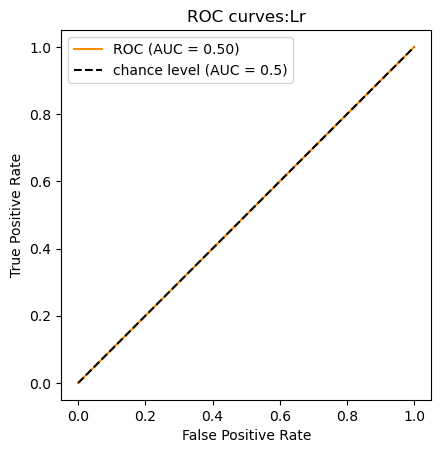

In [51]:
print("check variance")
check_error(y_val, y_pre_val_sv)
ROC_AUC("Lr", y_val, y_pre_val_sv)

## KNN

In [52]:
Knn = KNeighborsClassifier().fit(x_train, y_train)
y_pre_train_knn = Knn.predict(x_train)
y_pre_val_knn = Knn.predict(x_val)

check bias
accuracy:  0.8298007630351844
f1_score:  0.6321575813101236
precision: 0.5560032232070911
recall:    0.732484076433121
ROC AUC score of Lr: 0.74


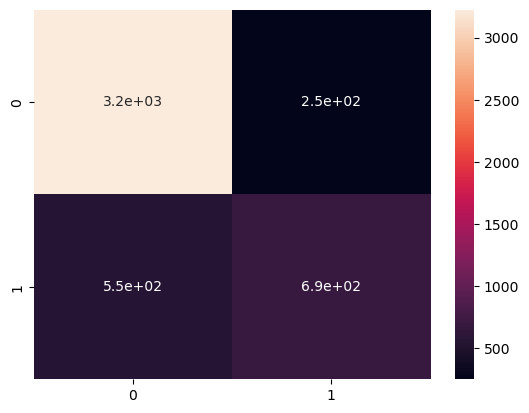

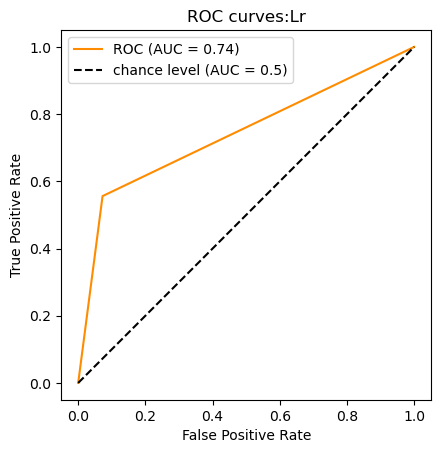

In [53]:
print("check bias")
check_error(y_train, y_pre_train_knn)
ROC_AUC("Lr", y_train, y_pre_train_knn)

check variance
accuracy:  0.7734767025089606
f1_score:  0.5311572700296736
precision: 0.46736292428198434
recall:    0.6151202749140894
ROC AUC score of Lr: 0.68


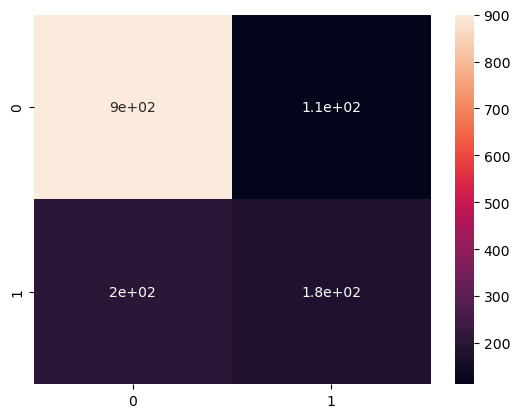

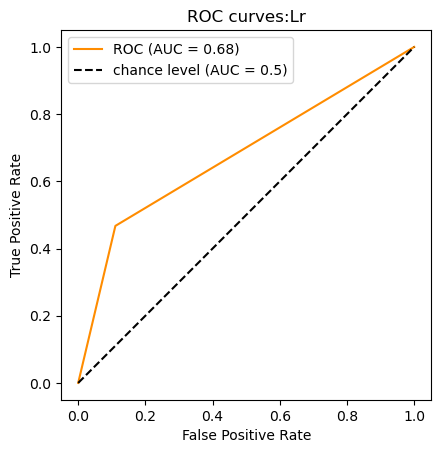

In [54]:
print("check variance")
check_error(y_val, y_pre_val_knn)
ROC_AUC("Lr", y_val, y_pre_val_knn)

## naive bayes

In [55]:
gnb = GaussianNB().fit(x_train, y_train)
y_pre_train_gnb = Knn.predict(x_train)
y_pre_val_gnb = Knn.predict(x_val)

check bias
accuracy:  0.8298007630351844
f1_score:  0.6321575813101236
precision: 0.5560032232070911
recall:    0.732484076433121
ROC AUC score of Lr: 0.74


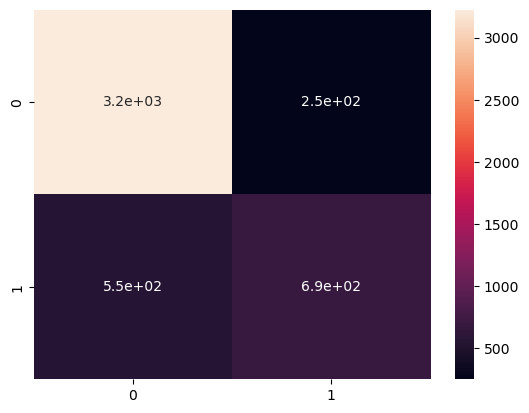

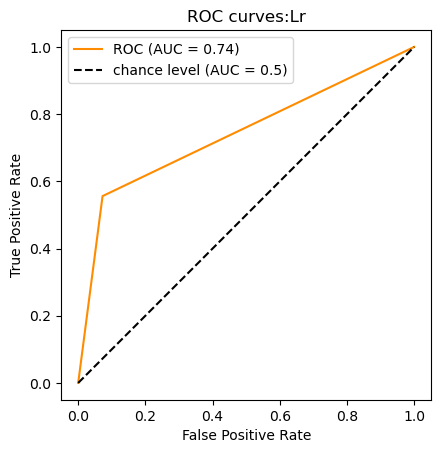

In [56]:
print("check bias")
check_error(y_train, y_pre_train_knn)
ROC_AUC("Lr", y_train, y_pre_train_knn)

check bias
accuracy:  0.7734767025089606
f1_score:  0.5311572700296736
precision: 0.46736292428198434
recall:    0.6151202749140894
ROC AUC score of Lr: 0.68


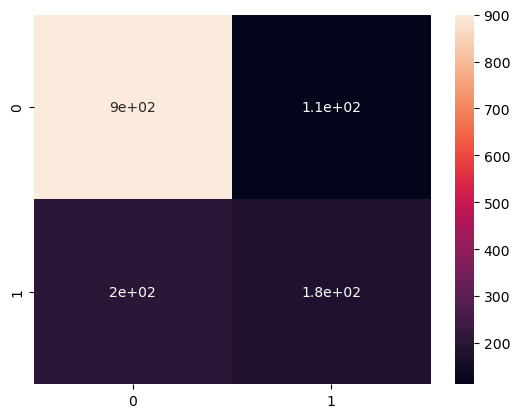

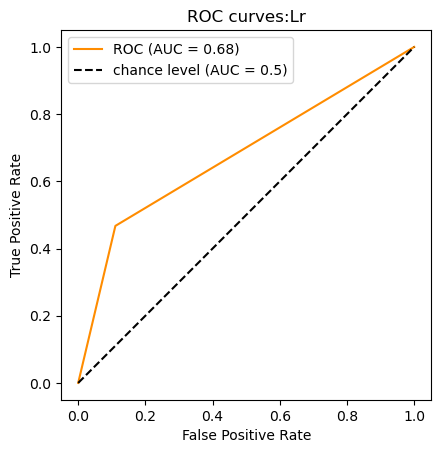

In [57]:
print("check bias")
check_error(y_val, y_pre_val_gnb)
ROC_AUC("Lr", y_val, y_pre_val_gnb)

## decision Tree

In [58]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()


0.7291267501842299

## Ensemble Methode

In [59]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,   min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()

0.7725728831532972

In [60]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean() 

0.7590081690242105

In [61]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()

0.7963095601847691

In [62]:
scores

array([0.80190678, 0.80614407, 0.79237288, 0.78897137, 0.7921527 ])

In [63]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf = clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_val, y_val))
print(clf.score(x_test, y_test))

0.8132683340398474
0.8193548387096774
0.810752688172043


In [64]:
clf = RidgeClassifier().fit(x_train, y_train)
clf.score(x_train, y_train)

0.801398897838067

# compare model

In [84]:
model_pipline = []
#1
model_pipline.append(LogisticRegression())
#2
model_pipline.append(SVC())
#3
model_pipline.append(KNeighborsClassifier())
#4
model_pipline.append(GaussianNB())
#5
model_pipline.append(DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0))
#6
model_pipline.append(RandomForestClassifier(n_estimators=10, max_depth=None,   min_samples_split=2, random_state=0))
#7
model_pipline.append(ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0))
#8
model_pipline.append(AdaBoostClassifier(n_estimators=100))
#9
model_pipline.append(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
#10
model_pipline.append(RidgeClassifier())

In [85]:
model_list = ['LogisticRegression',
             ' SVC',
               'KNeighborsClassifier',
               'GaussianNB',
               'DecisionTreeClassifier',
               'RandomForestClassifier',
               'ExtraTreesClassifier',
               'AdaBoostClassifier',
               'GradientBoostingClassifier',
               'RidgeClassifier',
               ]

acc_train_list = []
acc_val_list = []

auc_train_list = []
auc_val_list = []

cm_train_list = []
cm_val_list = []

cros_val_ = []


for model in model_pipline:

    model.fit(x_train, y_train)
    y_pre_train = model.predict(x_train)
    y_pre_val = model.predict(x_val)

    acc_train_list.append(accuracy_score(y_pre_train,y_train, normalize = True ))
    acc_val_list.append(accuracy_score(y_val,y_pre_val, normalize = True ))

    fpr_train, tpr_train, _threshould_train = roc_curve(y_train,y_pre_train)
    fpr_val, tpr_val, _threshould_val = roc_curve(y_val,y_pre_val)


    auc_train_list.append(np.round(auc(fpr_train, tpr_train),2))
    auc_val_list.append(np.round(auc(fpr_val, tpr_val),2))

    cm_train_list.append(confusion_matrix(y_train,y_pre_train))
    cm_val_list.append(confusion_matrix(y_val,y_pre_val))


In [90]:
result_df = pd.DataFrame({
    'Model': model_list, 
    'Accurency_train': acc_train_list,
    'Accurency_val': acc_val_list ,
    'AUC_train': auc_train_list,
    'AUC_val':auc_val_list
    })

In [91]:
result_df


,Model,Accurency_train,Accurency_val,AUC_train,AUC_val
0,LogisticRegression,0.805426,0.815054,0.72,0.74
1,SVC,0.736965,0.725448,0.50,0.50
2,KNeighborsClassifier,0.829801,0.773477,0.74,0.68
3,GaussianNB,0.690123,0.703943,0.74,0.76
4,DecisionTreeClassifier,0.998516,0.744803,1.00,0.68
5,RandomForestClassifier,0.978381,0.779928,0.96,0.68
6,ExtraTreesClassifier,0.998516,0.771326,1.00,0.67
7,AdaBoostClassifier,0.810725,0.812903,0.72,0.73
8,GradientBoostingClassifier,0.813268,0.819355,0.72,0.74
9,RidgeClassifier,0.801399,0.812186,0.70,0.73


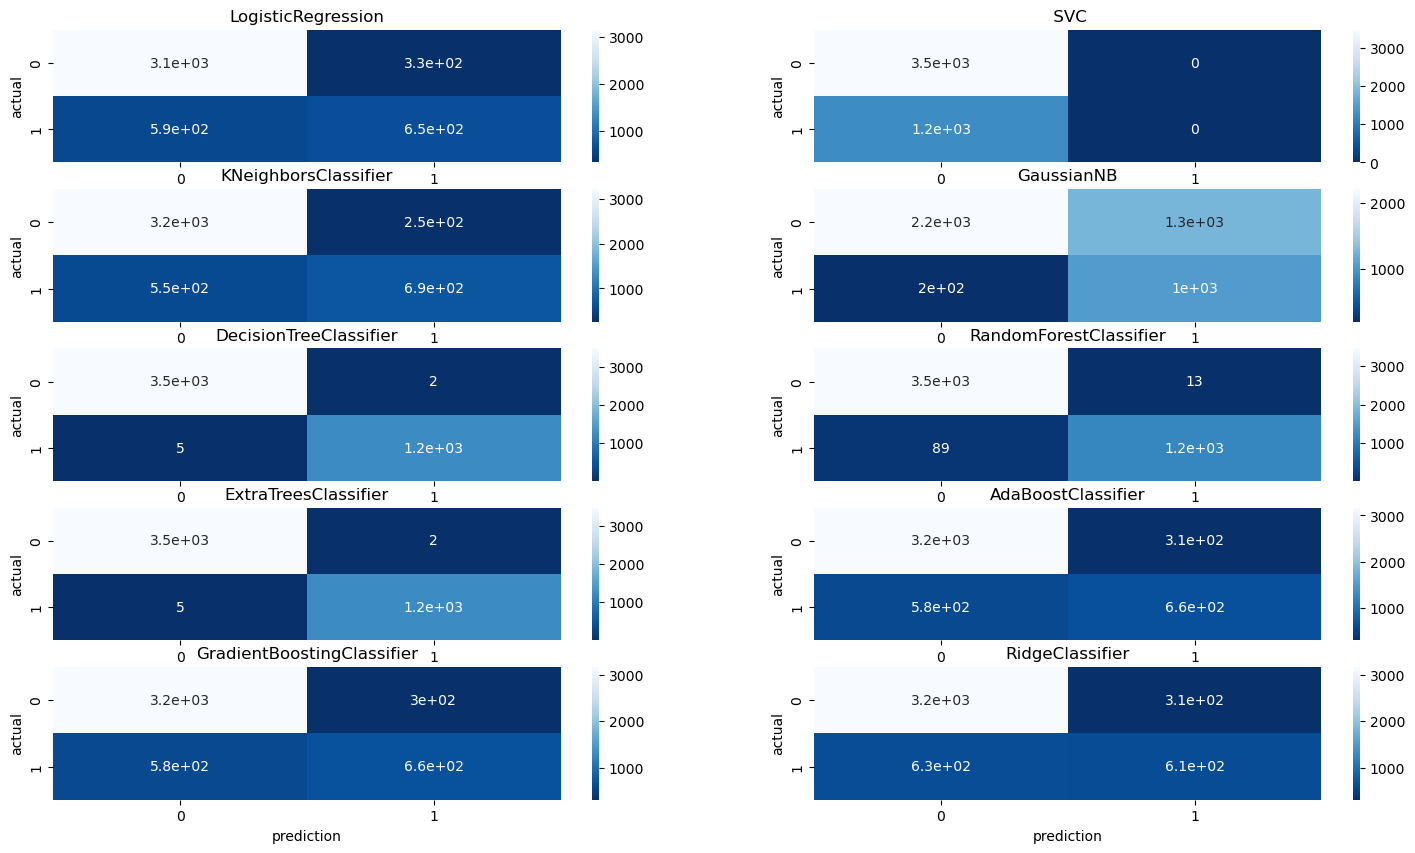

In [97]:
fig = plt.figure(figsize = (18, 10))

for i in range(len(cm_train_list)):
    cm = cm_train_list[i]
    model = model_list[i]
    sub =  fig.add_subplot(5,2,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot = True, cmap='Blues_r')
    cm_plot.set_xlabel("prediction")
    cm_plot.set_ylabel("actual")

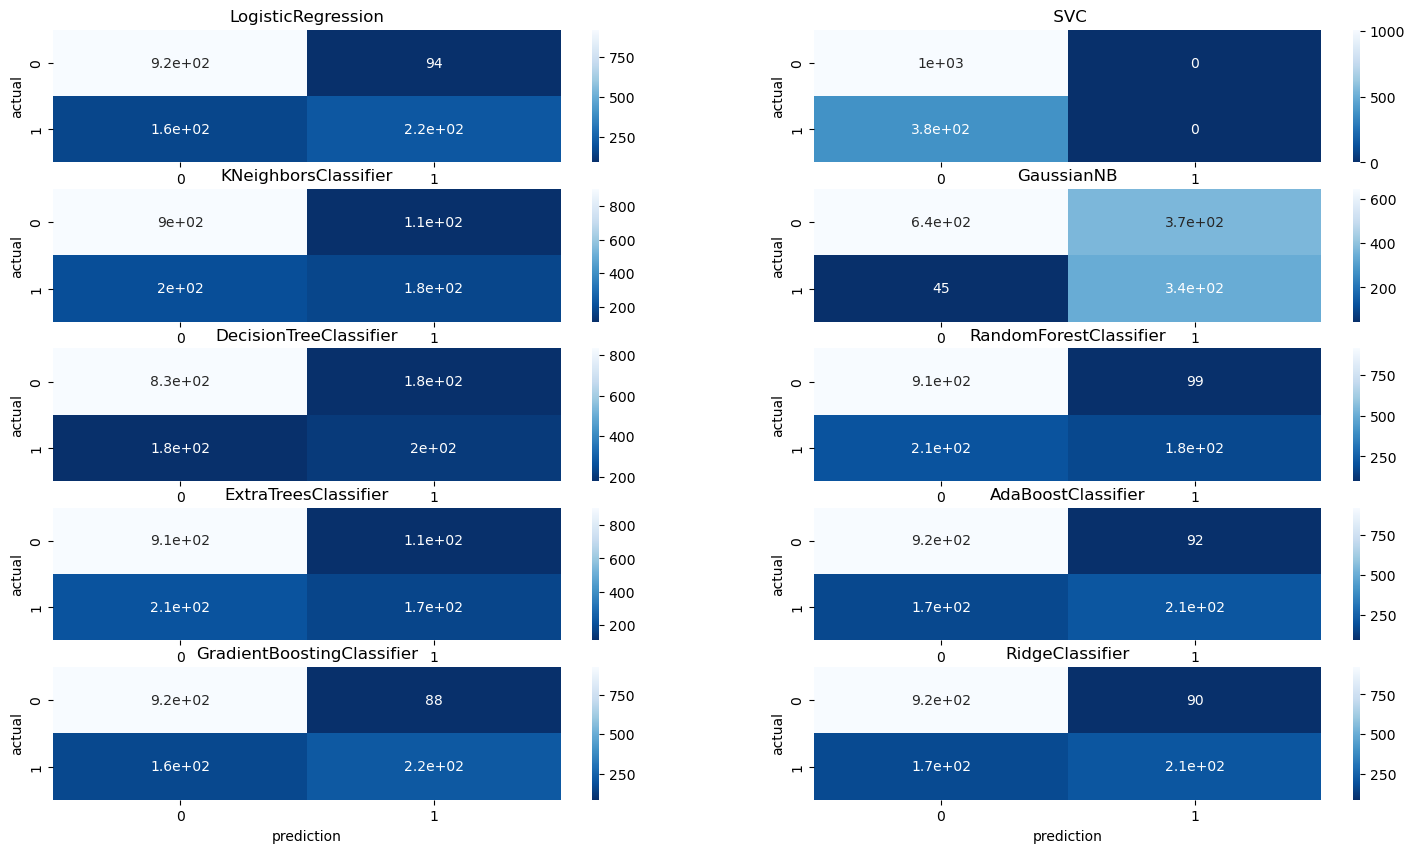

In [103]:
fig = plt.figure(figsize = (18, 10))

for i in range(len(cm_train_list)):
    cm = cm_val_list[i]
    model = model_list[i]
    sub =  fig.add_subplot(5,2,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot = True, cmap='Blues_r')
    cm_plot.set_xlabel("prediction")
    cm_plot.set_ylabel("actual")

In [104]:
1.6e+02

160.0

acc : 0.8118279569892473
auc : 0.76


<AxesSubplot:>

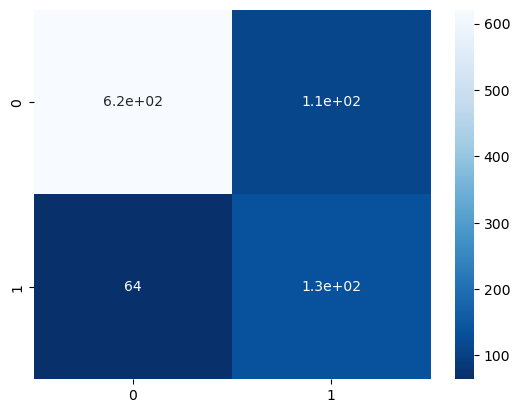

In [98]:
model = RidgeClassifier()
model.fit(x_train, y_train)
y_pre_test = model.predict(x_test)

acc_ = accuracy_score(y_pre_test,y_test, normalize = True )
fpr_, tpr_, _threshould_train = roc_curve(y_pre_test,y_test)
auc_ = np.round(auc(fpr_, tpr_),2)
cm = confusion_matrix(y_pre_test,y_test)

print("acc :", acc_)
print("auc :", auc_)
sns.heatmap(cm, annot = True, cmap='Blues_r')

In [100]:
print(classification_report(y_test, y_pre_test, target_names= ['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.85      0.91      0.88       685
     class 1       0.68      0.55      0.60       245

    accuracy                           0.81       930
   macro avg       0.76      0.73      0.74       930
weighted avg       0.80      0.81      0.80       930



In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)